# Handling Unbalanced Data - Random undersampling

What is Random Undersampling?

* Random undersampling is like randomly removing some of our regular item buyer records to make them less common.
* We're essentially throwing away some of the majority class data to balance the dataset.
* This helps our model focus more on the minority class (limited edition jacket buyers).

How it Works:

Identify the Majority Class:

* We find the class with more samples (regular item buyers).

Randomly Select Samples to Remove:

* We randomly choose some records from the majority class.

Remove the Selected Samples:

* We delete the selected records from our dataset.

Repeat:

* We repeat this process until the number of samples in the majority class is closer to the number of samples in the minority class.

# 1. Import necessary dependencies

In [77]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# 2. Create sample Dataset

In [78]:
# Sample DataFrame with unbalanced data (simulating limited edition purchases)

data = pd.DataFrame({
    'CustomerID': range(100),
    'Regular_Purchase': [1] * 95 + [0] * 5,  # 1 for regular, 0 for limited edition
    'Purchase_Amount': np.random.randint(50, 200, 100),  # Random purchase amounts
    'Customer_Age': np.random.randint(18, 65, 100)
})

print("Original Data :\n")
data

Original Data :



,CustomerID,Regular_Purchase,Purchase_Amount,Customer_Age
0,0,1,176,53
1,1,1,67,54
2,2,1,77,35
3,3,1,50,42
4,4,1,124,56
...,...,...,...,...
95,95,0,113,32
96,96,0,152,35
97,97,0,171,57
98,98,0,134,31


In [79]:
print("Original Data (Unbalanced):\n")
data['Regular_Purchase'].value_counts()

Original Data (Unbalanced):



,count
Regular_Purchase,
1,95
0,5


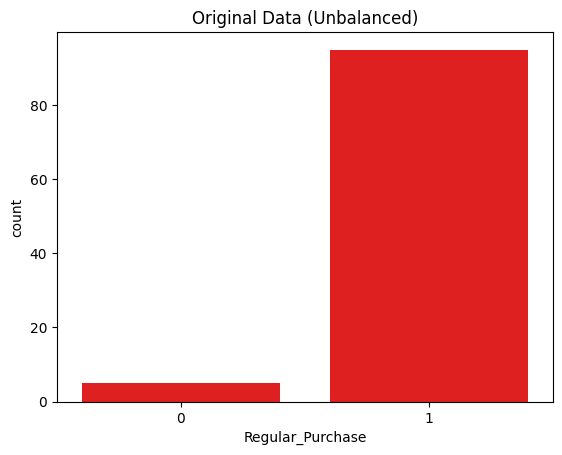

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Regular_Purchase', data=data , color='Red')
plt.title('Original Data (Unbalanced)')
plt.show()

# 3. Separate majority and minority classes

Separate Majority and Minority Classes:

* We split the DataFrame into two DataFrames: data_majority (regular purchases) and data_minority (limited edition purchases).

In [81]:
# Separate majority and minority classes

data_majority = data[data.Regular_Purchase == 1]
data_minority = data[data.Regular_Purchase == 0]

In [82]:
data_majority['Regular_Purchase'].value_counts()

,count
Regular_Purchase,
1,95


In [83]:
data_minority['Regular_Purchase'].value_counts()

,count
Regular_Purchase,
0,5


# 4. Undersample Majority Class:

* We use resample() from scikit-learn to undersample the majority class.
* replace=False ensures that we sample without replacement (no duplication).
* n_samples=len(data_minority) ensures that the undersampled majority class has the same number of samples as the minority class.
* random_state=42 sets a seed for reproducibility.

In [84]:
# Undersample majority class

data_majority_undersampled = resample(data_majority,
                                       replace=False,    # sample without replacement
                                       n_samples=len(data_minority),     # to match minority class
                                       random_state=42)  # reproducible results
data_majority_undersampled

,CustomerID,Regular_Purchase,Purchase_Amount,Customer_Age
68,68,1,147,25
22,22,1,109,41
72,72,1,53,28
73,73,1,149,28
0,0,1,176,53


# 5. Combine minority class with undersampled majority class

Combine Classes:

* We concatenate the undersampled majority class DataFrame and the minority class DataFrame to create the balanced dataset.
* We print the value counts of the Regular_Purchase column before and after undersampling to show the effect.

In [86]:
# Combine minority class with undersampled majority class

data_undersampled = pd.concat([data_majority_undersampled, data_minority])

print("\nData after Random Undersampling:\n")
data_undersampled['Regular_Purchase'].value_counts()


Data after Random Undersampling:



,count
Regular_Purchase,
1,5
0,5


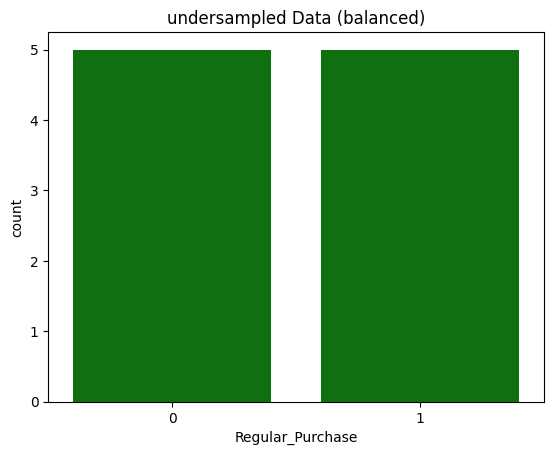

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Regular_Purchase', data=data_undersampled , color='Green')
plt.title('undersampled Data (balanced)')
plt.show()

# **Note

Key Points:

resample():

* This function from scikit-learn is used for resampling data.

Sampling Without Replacement:

* Undersampling involves sampling without replacement, which means that each sample is selected only once.

Balancing the Data:

* The goal of undersampling is to balance the class distribution in the dataset.

Information Loss:

* Be aware of the risk of information loss when using undersampling, as potentially valuable data is discarded.

Random State:

* Setting a random_state ensures that the results are reproducible.

Model Evaluation:

* It's important to evaluate the model's performance on a separate test set to avoid bias.

Data Splitting:

* It is crucial to split the data into training and test sets before undersampling. If you undersample before splitting, you risk data leakage and an overly optimistic evaluation of your model's performance.